In [1]:
import pandas as pd
import numpy as np
import re
import emoji
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from wordcloud import WordCloud

In [2]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9][0-9]), ([0-9]+):([0-9][0-9]) (am|pm) -'
    result = re.match(pattern, s)
    if result:
        return True
    return False
  
# Finds username of any given format.
def FindAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
        '([\w]+)[\u263a-\U0001f999]+:',    # Name and Emoji              
    ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False
  
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

import io
parsedData = [] 
conversationPath = 'chatW.txt' # chat file
with io.open(conversationPath, 'r', encoding='utf8') as fp:
    fp.readline()
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'User', 'Message']) 
df["Date"] = pd.to_datetime(df["Date"])

In [3]:
'''df['day'] = df['Date'].dt.strftime('%a')
df['month'] = df['Date'].dt.strftime('%b')
df['year'] = df['Date'].dt.year
df['date'] = df['Date'].apply(lambda x: x.date())'''

"df['day'] = df['Date'].dt.strftime('%a')\ndf['month'] = df['Date'].dt.strftime('%b')\ndf['year'] = df['Date'].dt.year\ndf['date'] = df['Date'].apply(lambda x: x.date())"

In [4]:
df = df.dropna()

In [5]:
df

,Date,Time,User,Message
3,2019-05-23,1:50 pm,Jeflowoow,Oigan estábamos pensando si le caemos a Nery e...
4,2019-05-23,1:50 pm,Jeflowoow,Qué dicen?
7,2019-05-23,1:50 pm,Jeflowoow,Pueden?
9,2019-05-23,2:52 pm,Johan,Waaay el sábado no puedo :(
10,2019-05-23,3:13 pm,Yeri,A qué hora sería?
...,...,...,...,...
5074,2020-11-23,7:45 pm,Yeri,JAJAJAJAJAJA
5075,2020-11-23,7:46 pm,Johan,JAJAJAJAJAJA
5077,2020-11-26,11:20 pm,Jeflowoow,<Media omitted>
5078,2020-11-26,11:21 pm,Karencita,<Media omitted>


In [6]:
df.describe()

,Date,Time,User,Message
count,3796,3796,3796,3796
unique,162,875,5,2613
top,2019-05-25 00:00:00,2:34 am,Johan,<Media omitted>
freq,211,23,1385,719
first,2019-05-23 00:00:00,NaN,NaN,NaN
last,2020-11-26 00:00:00,NaN,NaN,NaN


In [7]:
df['day'] = df['Date'].dt.strftime('%a')
df['month'] = df['Date'].dt.strftime('%b')
df['year'] = df['Date'].dt.year

In [8]:
df.head(15)

,Date,Time,User,Message,day,month,year
3,2019-05-23,1:50 pm,Jeflowoow,Oigan estábamos pensando si le caemos a Nery e...,Thu,May,2019
4,2019-05-23,1:50 pm,Jeflowoow,Qué dicen?,Thu,May,2019
7,2019-05-23,1:50 pm,Jeflowoow,Pueden?,Thu,May,2019
9,2019-05-23,2:52 pm,Johan,Waaay el sábado no puedo :(,Thu,May,2019
10,2019-05-23,3:13 pm,Yeri,A qué hora sería?,Thu,May,2019
13,2019-05-23,4:09 pm,Yeri,Mañana sí puedo después del mediodía,Thu,May,2019
14,2019-05-23,4:09 pm,Yeri,El sábado trabajo y sólo puedo en la tardecits,Thu,May,2019
16,2019-05-23,4:12 pm,Johan,Si,Thu,May,2019
17,2019-05-23,4:28 pm,Yeri,@5219993470816 qué procede amix? Puedes?,Thu,May,2019
18,2019-05-23,6:45 pm,Jeflowoow,Mañana a qué hora sería?,Thu,May,2019


In [9]:
total_messages = df.shape[0]
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

In [10]:
total_messages

3796

In [11]:
media_messages

719

#### Usuario más activo

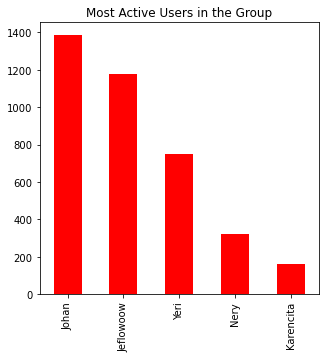

In [12]:
plt.figure(figsize= (5,5))
names = df['User'].value_counts()

names.plot(kind='bar', color='red', title='Most Active Users in the Group');

In [13]:
names

Johan        1385
Jeflowoow    1180
Yeri          747
Nery          321
Karencita     163
Name: User, dtype: int64

#### Usuario más activo porcentaje

In [14]:
msg_percent = (names *100)/ names.sum()
msg_percent

Johan        36.485774
Jeflowoow    31.085353
Yeri         19.678609
Nery          8.456270
Karencita     4.293994
Name: User, dtype: float64

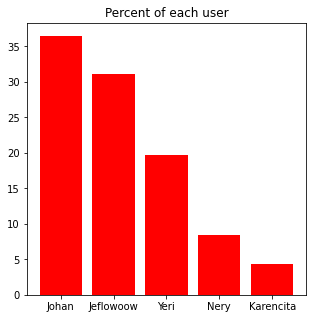

In [15]:
plt.figure(figsize= (5,5))
plt.bar(names.index, msg_percent,color='red' )
plt.title("Percent of each user")
plt.show()

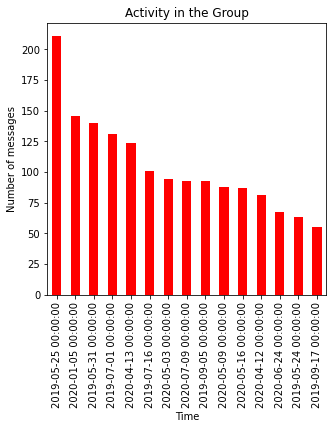

In [31]:
plt.figure(figsize= (5,5))
dates = df['Date'].value_counts()[0:15]
plt.xlabel('Time')
plt.ylabel('Number of messages')
dates.plot(kind='bar', color='red', title='Activity in the Group');

#### Media

         Date      Time       User          Message  day month  year  urlcount
21 2019-05-23   9:45 pm      Johan  <Media omitted>  Thu   May  2019         0
41 2019-05-24   9:17 am  Jeflowoow  <Media omitted>  Fri   May  2019         0
63 2019-05-24  11:23 am  Jeflowoow  <Media omitted>  Fri   May  2019         0
80 2019-05-24  11:30 am  Jeflowoow  <Media omitted>  Fri   May  2019         0
91 2019-05-24  11:37 am  Jeflowoow  <Media omitted>  Fri   May  2019         0


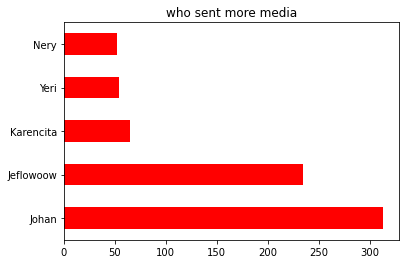

In [40]:
media_df = df[df['Message'] == '<Media omitted>']
print(media_df.head())

user_media = media_df['User'].value_counts()
top_10= user_media.head(10)
plt.title('who sent more media')
top_10.plot.barh(color='red');
plt.show()

In [18]:
new_df = df[(df.Message != '<Media omitted>')]
new_df = new_df.dropna()

In [19]:
new_df.head(15)

,Date,Time,User,Message,day,month,year,urlcount
3,2019-05-23,1:50 pm,Jeflowoow,Oigan estábamos pensando si le caemos a Nery e...,Thu,May,2019,0
4,2019-05-23,1:50 pm,Jeflowoow,Qué dicen?,Thu,May,2019,0
7,2019-05-23,1:50 pm,Jeflowoow,Pueden?,Thu,May,2019,0
9,2019-05-23,2:52 pm,Johan,Waaay el sábado no puedo :(,Thu,May,2019,0
10,2019-05-23,3:13 pm,Yeri,A qué hora sería?,Thu,May,2019,0
13,2019-05-23,4:09 pm,Yeri,Mañana sí puedo después del mediodía,Thu,May,2019,0
14,2019-05-23,4:09 pm,Yeri,El sábado trabajo y sólo puedo en la tardecits,Thu,May,2019,0
16,2019-05-23,4:12 pm,Johan,Si,Thu,May,2019,0
17,2019-05-23,4:28 pm,Yeri,@5219993470816 qué procede amix? Puedes?,Thu,May,2019,0
18,2019-05-23,6:45 pm,Jeflowoow,Mañana a qué hora sería?,Thu,May,2019,0


#### most common number of words and letters in a message

In [20]:
new_df['letter_count'] = new_df['Message'].apply(lambda s : len(s))
new_df['word_count'] = new_df['Message'].apply(lambda s : len(s.split(' ')))

In [21]:
new_df.head()

,Date,Time,User,Message,day,month,year,urlcount,letter_count,word_count
3,2019-05-23,1:50 pm,Jeflowoow,Oigan estábamos pensando si le caemos a Nery e...,Thu,May,2019,0,64,13
4,2019-05-23,1:50 pm,Jeflowoow,Qué dicen?,Thu,May,2019,0,10,2
7,2019-05-23,1:50 pm,Jeflowoow,Pueden?,Thu,May,2019,0,7,1
9,2019-05-23,2:52 pm,Johan,Waaay el sábado no puedo :(,Thu,May,2019,0,27,6
10,2019-05-23,3:13 pm,Yeri,A qué hora sería?,Thu,May,2019,0,17,4


In [22]:
new_df['letter_count'].mean() ##Promedio de letras usadas

21.008774780630485

In [23]:
new_df['letter_count'].sum() ##letras totales usadas

64644

In [28]:
new_df['word_count'].mean() ##Promedio de palabras usadas

3.970425739356516

In [29]:
new_df['word_count'].sum()# palabras usadas

12217

##### Top 15 Times of the day at which the most number of messages were sent

Text(0, 0.5, 'Time')

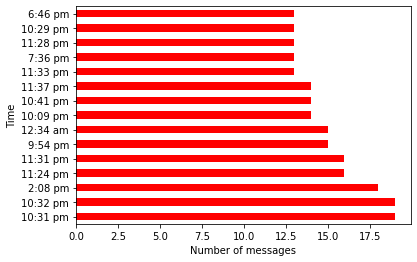

In [48]:
new_df['Time'].value_counts().head(15).plot.barh(color='red') 
plt.xlabel('Number of messages')
plt.ylabel('Time')


#### Palabras más usadas

In [25]:
import nltk
raw = []
for word in new_df.Message:
    token = nltk.word_tokenize(str(word).lower())
    raw.extend(token)

fdist = nltk.FreqDist(raw)

In [66]:
stopwords = set(['ok',\
 '.','por','el','que','a', 'si', 'sí','la','los',\
 'kar', 'qué', 'se','kuch', 'ki','are','aur',\
 ',', '?', 'va',  'https', 'más', 'no', \
 'un', 'me', 'su', 'mi', 'las', 'le', 'de', 'y', 'ya','los','lo',\
 'yo', 'una', 'en', 'te', 'es', 'tú', 'nos', 'este', 'sé','o','al','jajajaja',\
  'con', 'les', 'tu', 'pero', 'esta', 'porque', 'pues', 'este', 'para','o','al','está',\
   'eso', 'ahí', 'del', 'estoy', 'tengo', 'como', 'así', 'esa', 'hacer',])

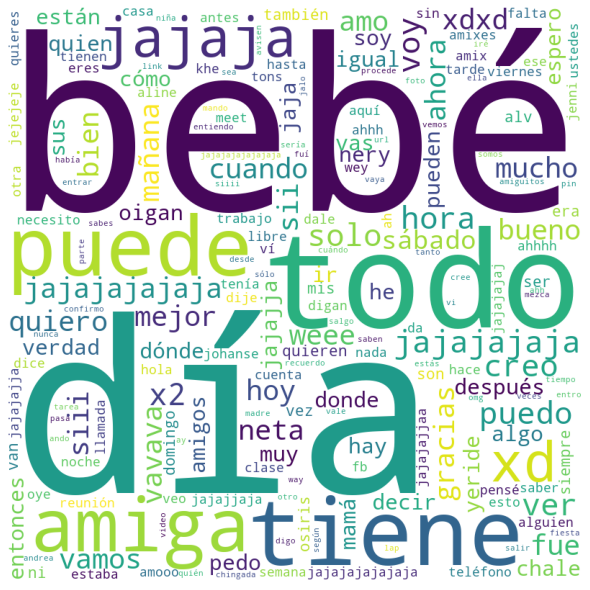

In [68]:
words_for_wordcloud = ' '.join([w[0] for w in fdist.most_common(300)])
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                stopwords=stopwords,min_font_size = 10).generate(words_for_wordcloud) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()


In [69]:
def dayofweek(i):
  l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  return l[i];
day_df=pd.DataFrame(new_df["Message"])
day_df['day_of_date'] = new_df['Date'].dt.weekday
day_df['day_of_date'] = day_df["day_of_date"].apply(dayofweek)
day_df["messagecount"] = 1
day = day_df.groupby("day_of_date").sum()
day.reset_index(inplace=True)

fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0,6000]
    )),
  showlegend=False
)
fig.show()

###### References:
    
- Análisis de chat grupal de Whatsapp (Python). (2020, 26 noviembre). ICHI.PRO.

- Kura, S. (2020, 24 noviembre). Whatsapp Group Chat Analysis using Python and Plotly. Medium.

- Anwar, A. (2020, 1 septiembre). AnalyzeTheChat — Python-based WhatsApp chat analyzer. Medium.